In [127]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
from sklearn import preprocessing
from sklearn import utils
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np


In [128]:
shooting_df = pd.read_csv('../Resources/18-2019_NBA_Player_Stats_NBAstuffer.csv', engine = 'python')
shooting_df.head()

,MPG,USG,FTA,FT%,TPA,2P%,threePA,3P%,eFG,TS,PPG,AST,ORTG
0,30.6,13.6,46,0.870,91,0.462,89,0.382,0.517,0.564,9.4,14.7,118.4
1,28.5,12.6,23,0.913,36,0.389,119,0.328,0.468,0.503,6.9,5.4,97.4
2,20.8,21.4,42,0.762,155,0.535,38,0.237,0.500,0.532,9.4,7.4,105.5
3,39.1,32.0,216,0.884,351,0.536,145,0.379,0.545,0.619,30.5,19.3,118.9
4,37.5,18.4,81,0.802,133,0.526,145,0.359,0.532,0.576,15.0,27.5,116.8


In [129]:
shooting_df.dtypes

MPG        float64
USG        float64
FTA          int64
FT%        float64
TPA          int64
2P%        float64
threePA      int64
3P%        float64
eFG        float64
TS         float64
PPG        float64
AST        float64
ORTG       float64
dtype: object

In [130]:
y = shooting_df["ORTG"]
target_names = ["negative", "positive"]

In [131]:
X = shooting_df.drop("ORTG", axis=1)

X.head()






,MPG,USG,FTA,FT%,TPA,2P%,threePA,3P%,eFG,TS,PPG,AST
0,30.6,13.6,46,0.870,91,0.462,89,0.382,0.517,0.564,9.4,14.7
1,28.5,12.6,23,0.913,36,0.389,119,0.328,0.468,0.503,6.9,5.4
2,20.8,21.4,42,0.762,155,0.535,38,0.237,0.500,0.532,9.4,7.4
3,39.1,32.0,216,0.884,351,0.536,145,0.379,0.545,0.619,30.5,19.3
4,37.5,18.4,81,0.802,133,0.526,145,0.359,0.532,0.576,15.0,27.5


In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [133]:
from sklearn.preprocessing import StandardScaler





X_scaler = StandardScaler().fit(X_train)



In [134]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [135]:
from sklearn.datasets import make_regression

n_features = 3
X, y = make_regression(n_samples=30, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape)
    
    
    

(30, 3)


In [136]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [137]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8234875318985017
Testing Score: 0.732207798896174


[]

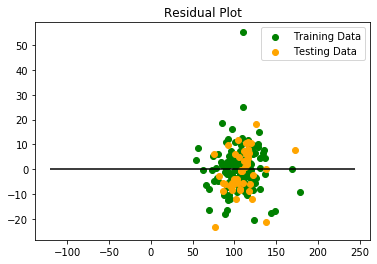

In [138]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="green", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.plot()

In [139]:
shooting_df["New"] = shooting_df["ORTG"]


shooting_df.loc[shooting_df['ORTG']>110, "New"] = 2
shooting_df.loc[(shooting_df['ORTG']>100) & (shooting_df["ORTG"] <= 110), "New"] =  1  
shooting_df.loc[shooting_df['ORTG']<=100, "New"] = 0
 

shooting_df





,MPG,USG,FTA,FT%,TPA,2P%,threePA,3P%,eFG,TS,PPG,AST,ORTG,New
0,30.6,13.6,46,0.870,91,0.462,89,0.382,0.517,0.564,9.4,14.7,118.4,2.0
1,28.5,12.6,23,0.913,36,0.389,119,0.328,0.468,0.503,6.9,5.4,97.4,0.0
2,20.8,21.4,42,0.762,155,0.535,38,0.237,0.500,0.532,9.4,7.4,105.5,1.0
3,39.1,32.0,216,0.884,351,0.536,145,0.379,0.545,0.619,30.5,19.3,118.9,2.0
4,37.5,18.4,81,0.802,133,0.526,145,0.359,0.532,0.576,15.0,27.5,116.8,2.0
5,37.1,23.0,87,0.759,279,0.541,104,0.279,0.508,0.540,19.0,12.9,110.2,2.0
6,24.7,15.3,31,0.774,68,0.397,98,0.388,0.506,0.534,8.0,15.7,110.0,1.0
7,15.9,18.1,19,0.737,64,0.500,62,0.387,0.540,0.558,6.5,11.4,110.0,1.0
8,38.4,29.0,157,0.943,187,0.524,244,0.377,0.548,0.620,28.2,23.9,119.5,2.0
9,38.7,17.5,71,0.718,171,0.591,57,0.228,0.529,0.563,13.3,30.8,109.9,1.0


In [140]:
from sklearn import tree
import pandas as pd
import os

In [141]:
target = shooting_df["New"]
target_names = ["negative", "positive"]

In [142]:
data = shooting_df.drop("New", axis=1)
feature_names = data.columns

data = data.drop("ORTG", axis=1)
feature_names = data.columns
data.head()

,MPG,USG,FTA,FT%,TPA,2P%,threePA,3P%,eFG,TS,PPG,AST
0,30.6,13.6,46,0.870,91,0.462,89,0.382,0.517,0.564,9.4,14.7
1,28.5,12.6,23,0.913,36,0.389,119,0.328,0.468,0.503,6.9,5.4
2,20.8,21.4,42,0.762,155,0.535,38,0.237,0.500,0.532,9.4,7.4
3,39.1,32.0,216,0.884,351,0.536,145,0.379,0.545,0.619,30.5,19.3
4,37.5,18.4,81,0.802,133,0.526,145,0.359,0.532,0.576,15.0,27.5


In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [144]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5652173913043478

In [145]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6086956521739131

In [146]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.22259507465118633, 'TS'),
 (0.1664166808640309, 'eFG'),
 (0.07945139997746202, '2P%'),
 (0.07696240874606954, 'FTA'),
 (0.06784653433072325, '3P%'),
 (0.0651368799573224, 'TPA'),
 (0.06377865994286162, 'USG'),
 (0.06142397424485804, 'PPG'),
 (0.05716557683746704, 'AST'),
 (0.04901647190920631, 'threePA'),
 (0.0471084655412031, 'FT%'),
 (0.043097872997609435, 'MPG')]

In [15]:
y = twopoint_df["ORTG"]
target_names = ["negative", "positive"]

In [16]:
X = twopoint_df.drop("ORTG", axis=1)




X.head()

,2P%
0,0.462
1,0.389
2,0.535
3,0.536
4,0.526


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler





X_scaler = StandardScaler().fit(X_train)

In [19]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
from sklearn.datasets import make_regression

n_features = 3
X, y = make_regression(n_samples=30, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape)

(30, 3)


In [16]:
twopoint_df = pd.read_csv('../Resources/TwoPointORTG.csv', engine = 'python')
twopoint_df.head()

,2P%,ORTG
0,0.462,118.4
1,0.389,97.4
2,0.535,105.5
3,0.536,118.9
4,0.526,116.8


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.150475196161721
Testing Score: 0.2510780062312753


Text(0.5, 1.0, 'Residual Plot')

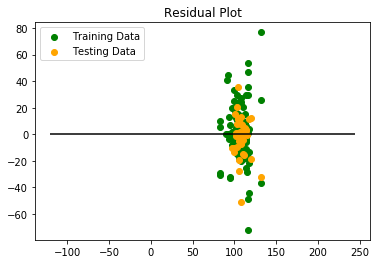

In [23]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="green", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [24]:
threepoint_df = pd.read_csv('../Resources/threepointORTG.csv', engine = 'python')
threepoint_df.head()

,threePA,ORTG,DRTG
0,89,118.4,97.2
1,119,97.4,101.6
2,38,105.5,91.9
3,145,118.9,102.7
4,145,116.8,100.1


In [25]:
y = threepoint_df["ORTG"]
target_names = ["negative", "positive"]

In [26]:
X = threepoint_df.drop("ORTG", axis=1)




X.head()

,threePA,DRTG
0,89,97.2
1,119,101.6
2,38,91.9
3,145,102.7
4,145,100.1


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler





X_scaler = StandardScaler().fit(X_train)

In [29]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
from sklearn.datasets import make_regression

n_features = 3
X, y = make_regression(n_samples=30, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape)

(30, 3)


In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [32]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.009351647246077177
Testing Score: -0.04624614299992592


Text(0.5, 1.0, 'Residual Plot')

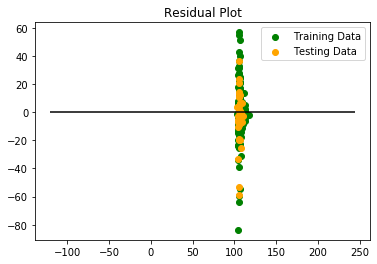

In [33]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="green", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [34]:
offense_df = pd.read_csv('../Resources/offense.csv', engine = 'python')
offense_df.head()

,AGE,GP,MPG,MIN,USG,TO_per,FTA,FT%,TPA,2P%,...,RPG,TRB,APG,AST,SPG,BPG,TOPG,VIRS,ORTG,DRTG
0,34.37,24,30.6,63.8,13.6,9.5,46,0.870,91,0.462,...,6.4,11.5,3.0,14.7,0.88,1.08,0.88,7.4,118.4,97.2
1,31.98,24,28.5,59.4,12.6,13.6,23,0.913,36,0.389,...,3.6,7.0,1.1,5.4,1.29,0.46,1.08,4.2,97.4,101.6
2,29.74,24,20.8,43.4,21.4,10.6,42,0.762,155,0.535,...,6.0,15.8,0.9,7.4,0.46,0.96,1.04,7.1,105.5,91.9
3,27.96,24,39.1,81.6,32.0,11.1,216,0.884,351,0.536,...,9.1,12.8,3.9,19.3,1.67,0.71,3.08,10.5,118.9,102.7
4,33.22,24,37.5,78.2,18.4,14.5,81,0.802,133,0.526,...,4.9,7.2,6.6,27.5,1.29,0.29,2.21,8.4,116.8,100.1


In [35]:
y = offense_df["ORTG"]
target_names = ["negative", "positive"]

In [36]:
X = offense_df.drop("ORTG", axis=1)




X.head()

,AGE,GP,MPG,MIN,USG,TO_per,FTA,FT%,TPA,2P%,...,PPG,RPG,TRB,APG,AST,SPG,BPG,TOPG,VIRS,DRTG
0,34.37,24,30.6,63.8,13.6,9.5,46,0.870,91,0.462,...,9.4,6.4,11.5,3.0,14.7,0.88,1.08,0.88,7.4,97.2
1,31.98,24,28.5,59.4,12.6,13.6,23,0.913,36,0.389,...,6.9,3.6,7.0,1.1,5.4,1.29,0.46,1.08,4.2,101.6
2,29.74,24,20.8,43.4,21.4,10.6,42,0.762,155,0.535,...,9.4,6.0,15.8,0.9,7.4,0.46,0.96,1.04,7.1,91.9
3,27.96,24,39.1,81.6,32.0,11.1,216,0.884,351,0.536,...,30.5,9.1,12.8,3.9,19.3,1.67,0.71,3.08,10.5,102.7
4,33.22,24,37.5,78.2,18.4,14.5,81,0.802,133,0.526,...,15.0,4.9,7.2,6.6,27.5,1.29,0.29,2.21,8.4,100.1


In [37]:
from sklearn.preprocessing import StandardScaler





X_scaler = StandardScaler().fit(X_train)

In [38]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
from sklearn.datasets import make_regression

n_features = 3
X, y = make_regression(n_samples=30, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape)

(30, 3)


In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [41]:
%matplotlib notebook


In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [43]:
per_df = pd.read_csv('../Resources/NBAPER.csv')
per_df.head()

,Player Name,PER,PPG,FG%,Initials
0,Nikola Jokic,29.6,25.1,0.506,Jokic
1,Derrick Favors,27.9,11.8,0.639,Favors
2,Kawhi Leonard,27.9,30.5,0.490,Leonard
3,Kevin Durant,26.8,32.3,0.514,Durant
4,Montrezl Harrell,26.6,18.3,0.730,Harrell


In [44]:
x_axis = np.arange(len(per_df))
tick_locations = [value for value in x_axis]

In [147]:
plt.figure(figsize=(10,3))
plt.bar(x_axis, per_df["PER"], color='r', alpha=0.5, align="center")
#plt.xticks(tick_locations, per_df["Player Name"], rotation="vertical")
plt.xticks(tick_locations, per_df["Initials"] )

NameError: name 'x_axis' is not defined

<Figure size 720x216 with 0 Axes>

In [55]:
perclean_df = pd.read_csv('../Resources/NBAPERCLEAN.csv')
per_df.head()

,Player Name,PER,PPG,FG%,Initials
0,Nikola Jokic,29.6,25.1,0.506,Jokic
1,Derrick Favors,27.9,11.8,0.639,Favors
2,Kawhi Leonard,27.9,30.5,0.490,Leonard
3,Kevin Durant,26.8,32.3,0.514,Durant
4,Montrezl Harrell,26.6,18.3,0.730,Harrell


In [56]:
y = perclean_df["PER"]
target_names = ["negative", "positive"]

In [57]:
X = perclean_df.drop("PER", axis=1)

X.head()


,PPG,FG%
0,25.1,0.506
1,11.8,0.639
2,30.5,0.490
3,32.3,0.514
4,18.3,0.730


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler





X_scaler = StandardScaler().fit(X_train)


In [60]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [61]:
from sklearn.datasets import make_regression

n_features = 3
X, y = make_regression(n_samples=30, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape)

(30, 3)


In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [63]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.13124998979175806
Testing Score: 0.17549405280249308


In [64]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="green", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

Text(0.5, 1, 'Residual Plot')

In [85]:
from sklearn import tree
import pandas as pd
import os

In [86]:
df = pd.read_csv('../Resources/NBAPERCLEAN.csv')
df.head()

,PER,PPG,FG%
0,29.6,25.1,0.506
1,27.9,11.8,0.639
2,27.9,30.5,0.490
3,26.8,32.3,0.514
4,26.6,18.3,0.730


In [87]:
target = df["PER"]
target_names = ["negative", "positive"]

In [88]:
data = df.drop("PER", axis=1)
feature_names = data.columns
data.head()

,PPG,FG%
0,25.1,0.506
1,11.8,0.639
2,30.5,0.490
3,32.3,0.514
4,18.3,0.730


In [ ]:
shooting_df["New"] = df["ORTG"]


shooting_df.loc[shooting_df['ORTG']>110, "New"] = 2
shooting_df.loc[(shooting_df['ORTG']>100) & (shooting_df["ORTG"] <= 110), "New"] =  1  
shooting_df.loc[shooting_df['ORTG']<=100, "New"] = 0
 

shooting_df

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [90]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)


ValueError: Unknown label type: 'continuous'

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

ValueError: Unknown label type: 'continuous'

In [92]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [110]:
X = shotchart_df.drop("TRB", axis=1)
y = shotchart_df["TRB"]
print(X.shape, y.shape)

NameError: name 'shotchart_df' is not defined

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [112]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
classifier.fit(X_train, y_train)

C:\Users\bassa\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [ ]:
X = shooting_df.TPA.values.reshape(-1, 1)
y = shooting_df.eFG.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

In [ ]:
plt.scatter(X, y)


In [ ]:
X = shooting_df.threePA.values.reshape(-1, 1)
y = shooting_df.eFG.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

In [114]:
plt.scatter(X, y)


In [115]:
#This is the data determining 3 point percentage in relation to effective fg%. Stephen curry attempted 244 3's at 37.7% make pecentage
#this is not as good as his his usual self but he was still well above average in effective field goal percentage 54.8%. Showing the importance of the three
#James Harden shot 13 3's per game with a total of 153. H econverted these well but shot a measly 48% 2 point percentage, despite
#rarely shooting mid range jumpers which is considered an ineffecient shot. 


#Kawhi made  53.5% of his 2 point shots despite shooting more mid range shots than anybody K
#Kawhi also shot 37.9 from 3 giving

In [116]:
shotchart_df = pd.read_csv('../Resources/NBA_shotchart(playoffs).csv')
shotchart_df.head()

,Player_name,Attempts<8ft,FG%<8ft,Attempts 8-16ft,FG% 8-16ft,Attempts 16-24ft,FG% 16-24ft,Attempts 24+ft,FG% 24+ft,Unassisted FG,Assisted FG,FG_percen,PPG
0,James Harden,543,55.8,68,38.2,6,50.0,768,35.3,517,85,41.3,31.6
1,Kevin Durant,45,75.6,50,52.0,50,52.0,80,43.8,73,52,51.4,32.3
2,Russell Westbrook,45,44.4,15,26.7,16,29.4,34,32.4,26,14,36.0,22.8
3,Giannis Antetokounmpo,174,59.8,21,14.3,11,36.4,55,32.7,66,63,49.4,25.5
4,Kawhi Leonard,288,58.0,296,46.6,139,46.0,291,36.4,300,176,49.0,30.5


In [117]:
#as you can se blahblah blah

In [118]:
from numpy.random import seed
seed(1)

In [119]:
import tensorflow
tensorflow.keras.__version__

ModuleNotFoundError: No module named 'tensorflow'

In [120]:
shotchart_df = pd.read_csv('../Resources/18-2019_NBA_Player_Stats_NBAstuffer.csv', engine = 'python')
shotchart_df.head()

,MPG,USG,FTA,FT%,TPA,2P%,threePA,3P%,eFG,TS,PPG,AST,ORTG
0,30.6,13.6,46,0.870,91,0.462,89,0.382,0.517,0.564,9.4,14.7,118.4
1,28.5,12.6,23,0.913,36,0.389,119,0.328,0.468,0.503,6.9,5.4,97.4
2,20.8,21.4,42,0.762,155,0.535,38,0.237,0.500,0.532,9.4,7.4,105.5
3,39.1,32.0,216,0.884,351,0.536,145,0.379,0.545,0.619,30.5,19.3,118.9
4,37.5,18.4,81,0.802,133,0.526,145,0.359,0.532,0.576,15.0,27.5,116.8


In [ ]:
X = shotchart_df.drop("FULL NAME", axis=1)
y = shotchart_df["FULL NAME"]
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [ ]:
model.summary()